# Load the dataset

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# Data EDA:

## Data Summary:

In [2]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [3]:
# Display the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (10000, 14)


In [4]:
# Check for missing values
print(df.isna().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [7]:
# Count the occurrences of unique values in a categorical feature
print(df['Product ID'].value_counts())

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64


## Date visualization:

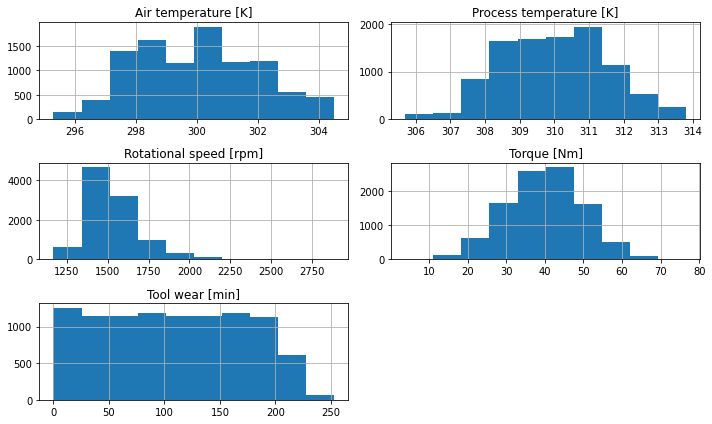

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distributions of numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

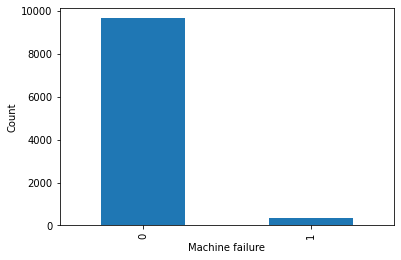

In [12]:
# Visualize the distribution of the target variable (machine failure)
plt.figure(figsize=(6, 4))
df['Machine failure'].value_counts().plot(kind='bar')
plt.xlabel('Machine failure')
plt.ylabel('Count')
plt.show()

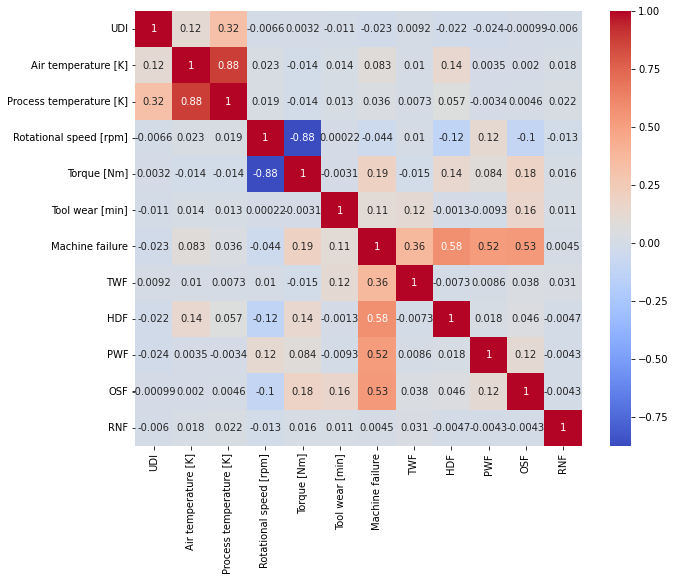

In [17]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
# Find the columns with the highest correlation
highest_correlation = correlation_matrix['Machine failure'].abs().sort_values(ascending=False)
highest_correlation = highest_correlation[highest_correlation != 1]  # Exclude self-correlations

# Print the columns with the highest correlation
print("Columns with the highest correlation with 'Machine failure':")
for column, correlation in highest_correlation.iteritems():
    print(f"{column}: {correlation}")

Columns with the highest correlation with 'Machine failure':
HDF: 0.575800152156236
OSF: 0.53108345118019
PWF: 0.5228122496269632
TWF: 0.3629036110061269
Torque [Nm]: 0.1913207750594941
Tool wear [min]: 0.1054482189195948
Air temperature [K]: 0.08255568978322685
Rotational speed [rpm]: 0.044187559734375326
Process temperature [K]: 0.03594597332975212
UDI: 0.02289180554800686
RNF: 0.004515993098786912


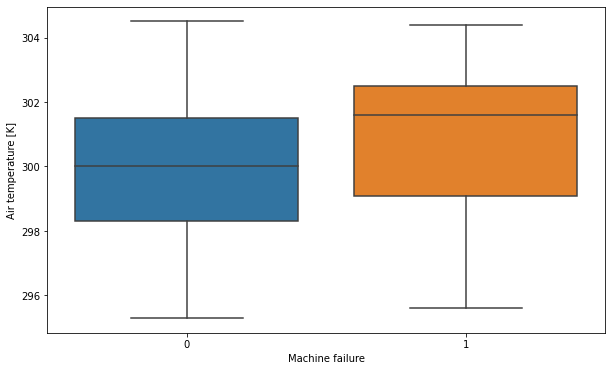

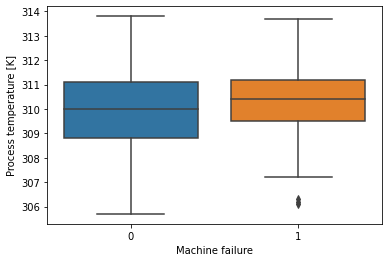

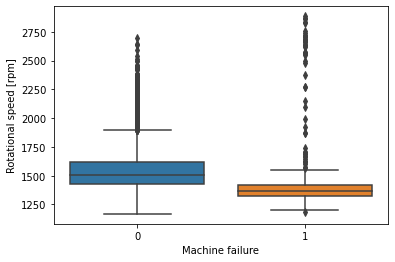

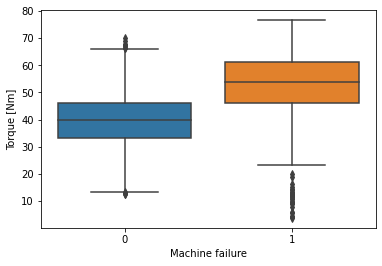

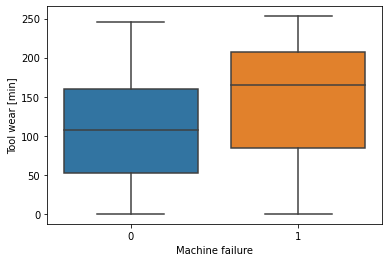

In [19]:
# Plot the relationship between numerical features and the target variable
plt.figure(figsize=(10, 6))
for feature in numerical_features:
    sns.boxplot(x='Machine failure', y=feature, data=df)
    plt.show()

In [78]:
# Select the features with high correlation
features = ['HDF', 'OSF', 'PWF', 'TWF', 'Torque [Nm]', 'Tool wear [min]']

In [79]:
# Prepare the data
X = df[features]
y = df['Machine failure']

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Machine failure'], test_size=0.25)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7500, 6)
Training Labels Shape: (7500,)
Testing Features Shape: (2500, 6)
Testing Labels Shape: (2500,)


# Model selection

In [107]:
# Train multiple models
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(),
    MLPClassifier()
]

In [109]:
# Lists to store the evaluation metrics
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

In [106]:
evaluation_scores = []

# Evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store the scores in a dictionary
    scores = {'Model': model.__class__.__name__,
              'Accuracy': accuracy,
              'Precision': precision,
              'Recall': recall,
              'F1 Score': f1,
              'ROC AUC': roc_auc}

    evaluation_scores.append(scores)

# Create a DataFrame from the evaluation scores
df_scores = pd.DataFrame(evaluation_scores)

# Plot the DataFrame using Plotly
fig = go.Figure(data=[go.Table(header=dict(values=list(df_scores.columns)),
                               cells=dict(values=[df_scores[col] for col in df_scores.columns]))
                     ])

fig.update_layout(title='Evaluation Metrics for Different Models')

fig.show()

C:\Users\21263\anaconda3\envs\snowflakes\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [110]:
# Lists to store the evaluation metrics
evaluation_scores = {metric: [] for metric in metrics}

# Evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append the scores to the lists
    evaluation_scores['Accuracy'].append(accuracy)
    evaluation_scores['Precision'].append(precision)
    evaluation_scores['Recall'].append(recall)
    evaluation_scores['F1 Score'].append(f1)
    evaluation_scores['ROC AUC'].append(roc_auc)

# Create a line plot using Plotly
fig = go.Figure()

for metric, scores in evaluation_scores.items():
    fig.add_trace(go.Scatter(x=[model.__class__.__name__ for model in models], y=scores, mode='lines+markers', name=metric))

fig.update_layout(
    title='Performance of Different Algorithms',
    xaxis_title='Algorithms',
    yaxis_title='Score',
    xaxis_tickangle=-45
)

fig.show()

C:\Users\21263\anaconda3\envs\snowflakes\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [104]:
# Lists to store the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
evaluation_scores = {metric: [] for metric in metrics}

# Evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append the scores to the lists
    evaluation_scores['Accuracy'].append(accuracy)
    evaluation_scores['Precision'].append(precision)
    evaluation_scores['Recall'].append(recall)
    evaluation_scores['F1 Score'].append(f1)
    evaluation_scores['ROC AUC'].append(roc_auc)

# Create separate plots for each algorithm
for model, metric_scores in zip(models, evaluation_scores.values()):
    algorithm_name = model.__class__.__name__
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=metrics, y=metric_scores, mode='lines+markers'))
    fig.update_layout(
        title=f'Performance of {algorithm_name}',
        xaxis_title='Metrics',
        yaxis_title='Score',
        xaxis_tickangle=-45
    )
    fig.show()

C:\Users\21263\anaconda3\envs\snowflakes\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [111]:
# Initialize lists to store model names and ROC AUC scores
model_names = []
roc_auc_scores = []

# Fit the models and calculate ROC AUC scores
for model in models:
    model_name = model.__class__.__name__
    model_names.append(model_name)

    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores.append(roc_auc)

# Create a plotly line plot for ROC AUC scores
fig = go.Figure(data=go.Scatter(x=model_names, y=roc_auc_scores, mode='lines+markers'))
fig.update_layout(title='ROC AUC Scores of Different Models',
                  xaxis_title='Model',
                  yaxis_title='ROC AUC Score')
fig.show()

# Interpretation:

## The DecisionTreeClassifier, RandomForestClassifier, and MLPClassifier models show high accuracy, precision, recall, F1 score, and ROC AUC values, indicating good overall performance.
## The SVC (Support Vector Machine) model shows a lower accuracy, precision, recall, and F1 score. It has a ROC AUC of 0.85, suggesting that it performs moderately well in distinguishing between the classes. The dataset may have class imbalance or contain features that are not well-separated by hyperplanes, affecting the model's performance
## The KNeighborsClassifier model has lower precision, recall, and F1 score values compared to the other models, indicating that it may struggle to correctly classify instances from the positive class. K-nearest neighbor models rely on the proximity of instances in the feature space, assuming that similar instances have similar labels. The model may struggle if the relevant features for predicting machine failure are not well-captured by the nearest neighbors.
## Tree-based models can effectively capture complex relationships in the data and handle both numerical and categorical features, leading to accurate predictions. Random Forest combines multiple decision trees, reducing overfitting and improving generalization.
## MLP (Multi-Layer Perceptron) models are capable of learning complex non-linear relationships in the data. The model's architecture with multiple hidden layers allows it to capture intricate patterns and representations. The dataset may exhibit non-linear relationships between the features and the target variable, which MLP models can effectively learn.
## Overall, the DecisionTreeClassifier, RandomForestClassifier, and MLPClassifier models perform well across the evaluation metrics, while the SVC and KNeighborsClassifier models show some limitations in certain areas.